In [3]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Глава 1.4

In [4]:
titanic_df = pd.read_csv('titanic.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_df.shape

(891, 12)

In [6]:
titanic_df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [7]:
titanic_df.dtypes.value_counts()

object     5
int64      5
float64    2
dtype: int64

# Глава 1.5

In [8]:
students_performance_df = pd.read_csv('StudentsPerformance.csv')
students_performance_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
len(students_performance_df[students_performance_df['lunch'] == 'free/reduced'])/len(students_performance_df)

0.355

In [10]:
students_performance_df['lunch'].value_counts(normalize=True)
# .round(2)

standard        0.645
free/reduced    0.355
Name: lunch, dtype: float64

In [11]:
# ??pd.Series.value_counts

In [12]:
#students_performance_df['average score'] = students_performance_df.filter(like = 'score').apply(sum)
#students_performance_df.head()
students_performance_df['average score'] = students_performance_df.filter(like = 'score').apply(lambda x: x.mean(),axis=1)

In [13]:
students_performance_df.groupby(['lunch']).agg(['mean','std'])

math score            reading score            writing score  \
                   mean        std          mean        std          mean   
lunch                                                                       
free/reduced  58.921127  15.159956     64.653521  14.895339     63.022535   
standard      70.034109  13.653501     71.654264  13.830602     70.823256   

                        average score             
                    std          mean        std  
lunch                                             
free/reduced  15.433823     62.199061  14.458324  
standard      14.339487     70.837209  13.186505

In [14]:
if 'average score' in students_performance_df.columns.tolist():
    students_performance_df = students_performance_df.drop('average score',axis=1)

In [15]:
students_performance_df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [16]:
students_performance_df = students_performance_df\
.rename(columns=lambda column_name:column_name.lower().replace(' ','_'))
students_performance_df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [17]:
students_scores = students_performance_df.filter(like='score')
students_scores

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [18]:
students_scores.apply(lambda row: row.mean(), axis=1)

0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Length: 1000, dtype: float64

In [19]:
if 'average_score' not in students_performance_df.columns.tolist():
    students_performance_df = students_performance_df\
                            .assign(average_score = students_scores
                                                    .apply(lambda row: row.mean().round(2), axis=1))

In [20]:
students_performance_df

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.00
996,male,group C,high school,free/reduced,none,62,55,55,57.33
997,female,group C,high school,free/reduced,completed,59,71,65,65.00
998,female,group D,some college,standard,completed,68,78,77,74.33


In [21]:
students_performance_df\
.groupby(['lunch'])\
.mean()\
.rename(columns=lambda column_name: f"mean_{column_name}")

,mean_math_score,mean_reading_score,mean_writing_score,mean_average_score
lunch,,,,
free/reduced,58.921127,64.653521,63.022535,62.198986
standard,70.034109,71.654264,70.823256,70.837116


In [22]:
students_performance_df\
.groupby(['lunch'])\
.var()\
.rename(columns=lambda column_name: f"var_{column_name}")
# .var() - дисперсия
# .std() - среднеквадратичное отклонение

,var_math_score,var_reading_score,var_writing_score,var_average_score
lunch,,,,
free/reduced,229.824270,221.871139,238.202881,209.042033
standard,186.418089,191.285560,205.620887,173.883953


In [23]:
students_performance_df[students_performance_df['parental_level_of_education']\
                        .isin(["bachelor's degree", "master's degree"])]

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
2,female,group B,master's degree,standard,none,90,95,93,92.67
14,female,group A,master's degree,standard,none,50,53,58,53.67
18,male,group C,master's degree,free/reduced,completed,46,42,46,44.67
24,male,group D,bachelor's degree,free/reduced,completed,74,71,80,75.00
...,...,...,...,...,...,...,...,...,...
957,female,group D,master's degree,standard,none,92,100,100,97.33
969,female,group B,bachelor's degree,standard,none,75,84,80,79.67
970,female,group D,bachelor's degree,standard,none,89,100,100,96.33
993,female,group D,bachelor's degree,free/reduced,none,62,72,74,69.33


In [24]:
df = pd.read_csv('column_hell.csv')
df.head()

,yrh&6,ohku,q,hfxx,umeca-4,apj,g,ijvnixxo,kudbpyw-3,upubjv,...,fi,clsruyy,g&6,qo$6,ap,o,sladymzr,tif,wuikzxt,wzuvc
0,0.288397,0.911359,0.488069,0.074599,0.016124,0.090555,0.560810,0.110975,0.430787,0.548763,...,0.793122,0.070335,0.145115,0.686579,0.071681,0.563068,0.815201,0.081902,0.333237,0.185148
1,0.861276,0.134987,0.701885,0.897921,0.507115,0.740151,0.963179,0.712024,0.671662,0.497596,...,0.477181,0.767931,0.996055,0.948774,0.054327,0.087341,0.072166,0.856081,0.120481,0.622113
2,0.775577,0.832874,0.862665,0.831049,0.003274,0.703112,0.509795,0.573296,0.286411,0.282792,...,0.421542,0.770413,0.749468,0.395022,0.307752,0.535575,0.341393,0.971201,0.714558,0.702453
3,0.857910,0.555818,0.598305,0.473988,0.784139,0.427963,0.725103,0.286610,0.863717,0.545562,...,0.240252,0.010355,0.759912,0.965837,0.110719,0.439488,0.816526,0.111621,0.373365,0.461615
4,0.748652,0.451725,0.252619,0.584361,0.011265,0.051115,0.755444,0.627191,0.206172,0.955043,...,0.846165,0.043458,0.209347,0.028276,0.700446,0.203503,0.181903,0.428842,0.099398,0.175227


In [25]:
selected_columns = df.filter(like='-')
#То же самое
# selected_columns = df.filter(like='-',axis=1)
selected_columns

,umeca-4,kudbpyw-3,g-3,v-9,fla-6,hwtbyrkp-5
0,0.016124,0.430787,0.202407,0.725508,0.305076,0.979296
1,0.507115,0.671662,0.864249,0.867818,0.358859,0.160520
2,0.003274,0.286411,0.928865,0.719159,0.340235,0.734612
3,0.784139,0.863717,0.175446,0.554744,0.049325,0.621132
4,0.011265,0.206172,0.044151,0.163643,0.048806,0.437836
...,...,...,...,...,...,...
95,0.220817,0.434444,0.601738,0.146333,0.918888,0.216499
96,0.474131,0.176011,0.359793,0.104707,0.257690,0.066934
97,0.091637,0.871606,0.121075,0.907699,0.313184,0.788592
98,0.360106,0.172385,0.015285,0.019571,0.060751,0.403166


# Глава 1.6

In [26]:
dota_df = pd.read_csv('dota_hero_stats.csv')
dota_df.head()

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"


In [27]:
dota_df.count()

Unnamed: 0        117
attack_type       117
id                117
legs              117
localized_name    117
name              117
primary_attr      117
roles             117
dtype: int64

In [28]:
dota_df.columns.tolist()

['Unnamed: 0',
 'attack_type',
 'id',
 'legs',
 'localized_name',
 'name',
 'primary_attr',
 'roles']

In [29]:
if 'Unnamed: 0' in dota_df.columns.tolist():
    dota_df = dota_df.drop(['Unnamed: 0'], axis=1)
dota_df

,attack_type,id,legs,localized_name,name,primary_attr,roles
0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"
...,...,...,...,...,...,...,...
112,Melee,114,2,Monkey King,npc_dota_hero_monkey_king,agi,"['Carry', 'Escape', 'Disabler', 'Initiator']"
113,Ranged,119,2,Dark Willow,npc_dota_hero_dark_willow,int,"['Support', 'Nuker', 'Disabler', 'Escape']"
114,Melee,120,2,Pangolier,npc_dota_hero_pangolier,agi,"['Carry', 'Nuker', 'Disabler', 'Durable', 'Esc..."
115,Ranged,121,2,Grimstroke,npc_dota_hero_grimstroke,int,"['Support', 'Nuker', 'Disabler', 'Escape']"


In [30]:
dota_df.shape

(117, 7)

In [31]:
dota_df.legs.value_counts().sort_index()

0    11
2    95
4     7
6     3
8     1
Name: legs, dtype: int64

In [32]:
dota_df\
.groupby('legs',as_index=False)\
.agg({'id':'count'})\
.rename(columns={'id':'heroes_number'})

,legs,heroes_number
0,0,11
1,2,95
2,4,7
3,6,3
4,8,1


In [33]:
dota_df\
.groupby('legs')\
.describe()

id                                                     
     count       mean        std   min   25%   50%   75%    max
legs                                                           
0     11.0  47.727273  32.554849  10.0  21.5  40.0  78.0   94.0
2     95.0  60.842105  34.994928   1.0  31.5  60.0  88.5  129.0
4      7.0  63.571429  32.035694   3.0  55.0  63.0  86.0   97.0
6      3.0  69.666667  47.247575  16.0  52.0  88.0  96.5  105.0
8      1.0  61.000000        NaN  61.0  61.0  61.0  61.0   61.0

In [34]:
dota_df\
.groupby('legs')\
.agg({'legs':'count'})\
.rename(columns={'legs':'heroes_number'})\
.reset_index()

,legs,heroes_number
0,0,11
1,2,95
2,4,7
3,6,3
4,8,1


In [35]:
dota_df\
.groupby('legs')\
.size()

legs
0    11
2    95
4     7
6     3
8     1
dtype: int64

In [36]:
accountancy_df = pd.read_csv('accountancy.csv')
accountancy_df.head()

,Unnamed: 0,Executor,Type,Salary
0,0,Pupa,D,63
1,1,Pupa,A,158
2,2,Pupa,D,194
3,3,Pupa,E,109
4,4,Loopa,E,184


In [37]:
accountancy_df.count()

Unnamed: 0    50
Executor      50
Type          50
Salary        50
dtype: int64

In [38]:
accountancy_df.shape

(50, 4)

In [39]:
if 'Unnamed: 0' in accountancy_df.columns.tolist():
    accountancy_df = accountancy_df.drop(['Unnamed: 0'], axis=1)
accountancy_df.head()

,Executor,Type,Salary
0,Pupa,D,63
1,Pupa,A,158
2,Pupa,D,194
3,Pupa,E,109
4,Loopa,E,184


In [40]:
accountancy_df.dtypes

Executor    object
Type        object
Salary       int64
dtype: object

In [41]:
old_columns_names_list = accountancy_df.columns.tolist()
new_columns_names_list = [column_name.lower() for column_name in accountancy_df.columns.tolist()]
accountancy_df = accountancy_df\
.rename(columns=dict(zip(old_columns_names_list,new_columns_names_list)))

In [42]:
# dict(zip(old_columns_names_list,new_columns_names_list))

In [43]:
accountancy_df.head(20)

,executor,type,salary
0,Pupa,D,63
1,Pupa,A,158
2,Pupa,D,194
3,Pupa,E,109
4,Loopa,E,184
5,Loopa,F,232
6,Loopa,B,249
7,Pupa,F,195
8,Pupa,A,115
9,Pupa,E,65


In [44]:
accountancy_df\
.groupby(['type','executor'],as_index=False)\
.agg({'salary':'mean'})\
.round(2)\
.sort_values(by=['type','salary'],ascending=[True, False])\
.groupby(['type'])\
.head(1)

,type,executor,salary
1,A,Pupa,160.83
2,B,Loopa,145.17
4,C,Loopa,154.33
7,D,Pupa,146.50
8,E,Loopa,164.00
10,F,Loopa,238.00


In [45]:
dota_df.groupby(['attack_type','primary_attr'])\
.size()\
.sort_values(ascending=False)

attack_type  primary_attr
Ranged       int             40
Melee        str             35
             agi             19
Ranged       agi             18
             str              3
Melee        int              2
dtype: int64

In [46]:
concentrations = pd.read_csv('algae.csv')
concentrations.head()

,species,genus,group,sucrose,alanin,citrate,glucose,oleic_acid
0,Fucus_vesiculosus,Fucus,brown,3.001472,3.711498,5.004262,2.548459,6.405165
1,Saccharina_japonica,Saccharina,brown,6.731070,1.255251,5.621499,6.013219,4.156700
2,Fucus_serratus,Fucus,brown,3.276870,0.346431,1.216767,3.623225,0.304573
3,Fucus_distichus,Fucus,brown,6.786996,6.641303,6.423606,2.272724,3.393203
4,Cladophora_fracta,Cladophora,green,3.861470,1.648450,6.940588,2.316955,2.528886


In [47]:
concentrations.dtypes

species        object
genus          object
group          object
sucrose       float64
alanin        float64
citrate       float64
glucose       float64
oleic_acid    float64
dtype: object

In [48]:
concentrations.count()

species       10
genus         10
group         10
sucrose       10
alanin        10
citrate       10
glucose       10
oleic_acid    10
dtype: int64

In [49]:
mean_concentrations = concentrations\
.groupby('genus')\
.mean()
mean_concentrations

,sucrose,alanin,citrate,glucose,oleic_acid
genus,,,,,
Ascophyllum,6.825467,0.875429,5.253527,3.414961,2.432526
Cladophora,4.008792,3.997055,5.288311,2.800276,2.263472
Fucus,4.355112,3.566411,4.214878,2.814803,3.367647
Palmaria,0.704580,3.176440,5.573905,3.242090,2.245538
Saccharina,4.183596,3.524207,3.346710,4.980594,4.487252


In [50]:
concentrations.query('genus == "Fucus"').alanin.describe().round(2)

count    3.00
mean     3.57
std      3.15
min      0.35
25%      2.03
50%      3.71
75%      5.18
max      6.64
Name: alanin, dtype: float64

In [51]:
concentrations.group.unique()

array(['brown', 'green', 'red'], dtype=object)

In [52]:
concentrations.groupby('group').citrate.var().round(2)

group
brown    5.47
green    3.95
red       NaN
Name: citrate, dtype: float64

In [53]:
concentrations.groupby('group').species.nunique()

group
brown    6
green    3
red      1
Name: species, dtype: int64

In [54]:
concentrations.groupby('group').sucrose.describe()

,count,mean,std,min,25%,50%,75%,max
group,,,,,,,,
brown,6.0,4.709666,2.336471,1.636122,3.070321,5.00397,6.773014,6.825467
green,3.0,4.008792,1.634817,2.452623,3.157047,3.86147,4.786877,5.712284
red,1.0,0.704580,NaN,0.704580,0.704580,0.70458,0.704580,0.704580


In [55]:
concentrations.groupby('group').describe().round(2).transpose()

group             brown  green   red
sucrose    count   6.00   3.00  1.00
           mean    4.71   4.01  0.70
           std     2.34   1.63   NaN
           min     1.64   2.45  0.70
           25%     3.07   3.16  0.70
           50%     5.00   3.86  0.70
           75%     6.77   4.79  0.70
           max     6.83   5.71  0.70
alanin     count   6.00   3.00  1.00
           mean    3.10   4.00  3.18
           std     2.69   2.66   NaN
           min     0.35   1.65  3.18
           25%     0.97   2.56  3.18
           50%     2.48   3.46  3.18
           75%     5.27   5.17  3.18
           max     6.64   6.88  3.18
citrate    count   6.00   3.00  1.00
           mean    4.10   5.29  5.57
           std     2.34   1.99   NaN
           min     1.07   3.08  5.57
           25%     2.16   4.46  5.57
           50%     5.13   5.84  5.57
           75%     5.53   6.39  5.57
           max     6.42   6.94  5.57
glucose    count   6.00   3.00  1.00
           mean    3.64   2.80  3.24
           std     1.33   0.52   NaN
           min     2.27   2.32  3.24
           25%     2.77   2.53  3.24
           50%     3.52   2.74  3.24
           75%     3.87   3.04  3.24
           max     6.01   3.34  3.24
oleic_acid count   6.00   3.00  1.00
           mean    3.58   2.26  2.25
           std     2.09   0.74   NaN
           min     0.30   1.43  2.25
           25%     2.67   1.98  2.25
           50%     3.77   2.53  2.25
           75%     4.65   2.68  2.25
           max     6.41   2.83  2.25

In [56]:
concentrations\
.groupby('group')\
.sucrose\
.apply(lambda x:x.max()-x.min())\
.round(2)\
.rename('sucrose_values_range')

group
brown    5.19
green    3.26
red      0.00
Name: sucrose_values_range, dtype: float64

In [57]:
concentrations.alanin

0    3.711498
1    1.255251
2    0.346431
3    6.641303
4    1.648450
5    3.461692
6    6.881024
7    3.176440
8    5.793163
9    0.875429
Name: alanin, dtype: float64

In [58]:
concentrations.alanin**2

0    13.775217
1     1.575655
2     0.120015
3    44.106908
4     2.717387
5    11.983313
6    47.348485
7    10.089769
8    33.560739
9     0.766376
Name: alanin, dtype: float64

In [59]:
np.log(concentrations.alanin)

0    1.311436
1    0.227335
2   -1.060071
3    1.893308
4    0.499835
5    1.241758
6    1.928767
7    1.155761
8    1.756678
9   -0.133041
Name: alanin, dtype: float64

# Глава 1.7

In [60]:
df = pd.read_csv('income.csv')
df

,income
2018-11-30,20
2018-12-31,60
2019-01-31,180
2019-02-28,380
2019-03-31,660


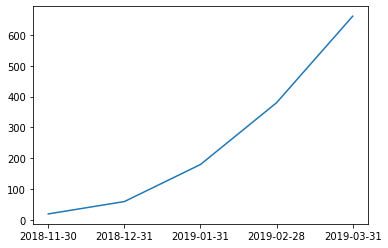

In [61]:
plt.plot(df.index, df.income)

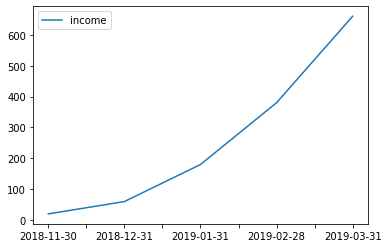

In [62]:
df.plot()

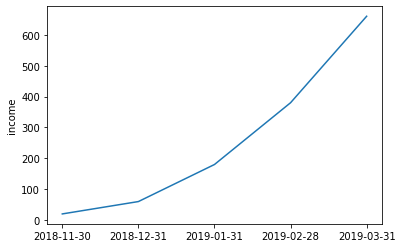

In [63]:
sns.lineplot(x=df.index,y=df.income)

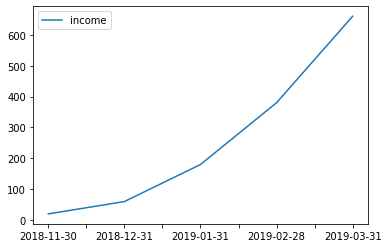

In [64]:
df.plot(kind='line')

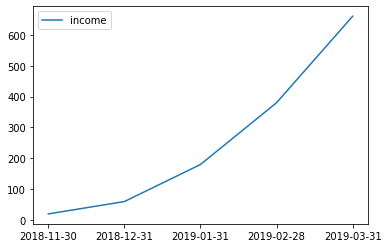

In [65]:
sns.lineplot(data=df)

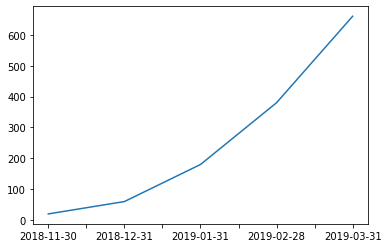

In [66]:
df.income.plot()

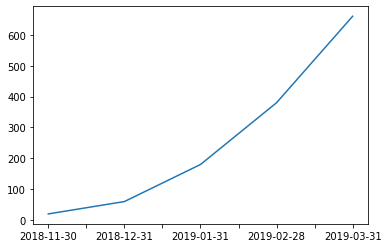

In [67]:
df['income'].plot()

In [68]:
df_1 = pd.read_csv('dataset_209770_6.txt', sep=' ')
df_1

,x,y
0,792.871052,195.389429
1,806.145509,198.232417
2,801.528588,183.377678
3,1514.208252,596.240503
4,1002.297318,1488.332388
5,1505.155789,600.916712
6,1010.930159,1499.400639
7,804.276717,210.145634
8,804.058405,199.280665
9,1005.634284,1509.426743


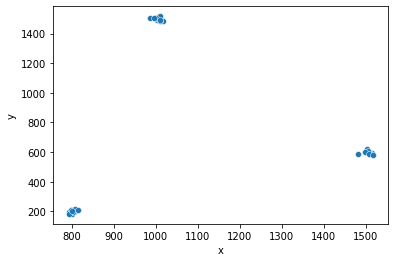

In [69]:
sns.scatterplot(x='x', y='y', data=df_1)

In [70]:
genome_df = pd.read_csv('genome_matrix.csv')
genome_df

,Unnamed: 0,species0,species1,species2,species3,species4
0,species0,0.536029,0.920292,0.679708,0.840606,0.430842
1,species1,0.920292,0.862417,0.887593,0.769754,0.203214
2,species2,0.679708,0.887593,0.595156,0.003435,0.096052
3,species3,0.840606,0.769754,0.003435,0.458870,0.029251
4,species4,0.430842,0.203214,0.096052,0.029251,0.642109


In [71]:
genome_df = genome_df\
.rename(columns={'Unnamed: 0':'species_name'})\
.set_index(keys='species_name')

genome_df

,species0,species1,species2,species3,species4
species_name,,,,,
species0,0.536029,0.920292,0.679708,0.840606,0.430842
species1,0.920292,0.862417,0.887593,0.769754,0.203214
species2,0.679708,0.887593,0.595156,0.003435,0.096052
species3,0.840606,0.769754,0.003435,0.458870,0.029251
species4,0.430842,0.203214,0.096052,0.029251,0.642109


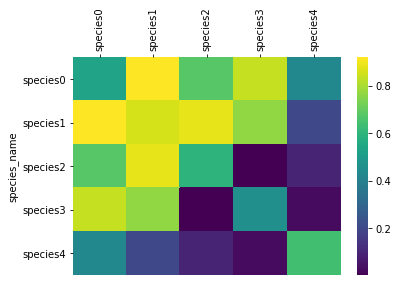

In [72]:
g = sns.heatmap(data=genome_df, cmap='viridis')
g.xaxis.set_ticks_position('top')
g.xaxis.set_tick_params(rotation=90)

In [73]:
dota_df.head()

,attack_type,id,legs,localized_name,name,primary_attr,roles
0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"


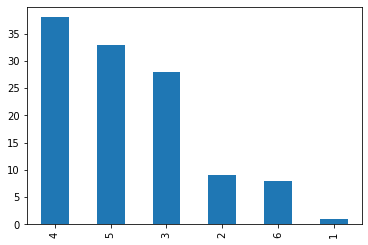

In [74]:
dota_df['roles_number'] = dota_df.roles.apply(lambda x: len(x.split(',')))
dota_df.roles_number.value_counts().plot.bar()

In [75]:
#Векторизация данных pd.Series.str - вектор строковых значений
dota_df.roles.str.split(',').str.len()

0      3
1      4
2      4
3      5
4      4
      ..
112    4
113    4
114    6
115    4
116    4
Name: roles, Length: 117, dtype: int64

In [76]:
def string_list_to_list(string_list):
# Убираем пробелы и скобки в начале и конце строки и разбиваем её по разделителю ","    
    list_ = string_list.strip(" []").split(",")

# Убираем пробелы и кавычки в строковых элементах списка list_ 
    list_ = [element.strip("' ") for element in list_]
    return list_

In [77]:
dota_roles = dota_df.roles.apply(string_list_to_list)
dota_roles

0                                 [Carry, Escape, Nuker]
1                [Initiator, Durable, Disabler, Jungler]
2                    [Support, Disabler, Nuker, Durable]
3           [Carry, Disabler, Jungler, Nuker, Initiator]
4                    [Support, Disabler, Nuker, Jungler]
                             ...                        
112                 [Carry, Escape, Disabler, Initiator]
113                   [Support, Nuker, Disabler, Escape]
114    [Carry, Nuker, Disabler, Durable, Escape, Init...
115                   [Support, Nuker, Disabler, Escape]
116                [Carry, Initiator, Disabler, Durable]
Name: roles, Length: 117, dtype: object

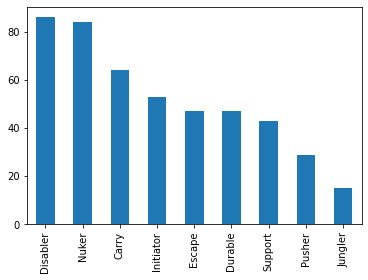

In [78]:
dota_roles.explode().value_counts().plot.bar()

In [79]:
import json

In [80]:
json.loads('[123,"one","two"]')

[123, 'one', 'two']

In [81]:
# Выдает ошибку
# json.loads("[123,'one','two']")

In [82]:
iris_df = pd.read_csv('iris.csv')
iris_df.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,0,5.1,3.5,1.4,0.2,0
1,1,4.9,3.0,1.4,0.2,0
2,2,4.7,3.2,1.3,0.2,0
3,3,4.6,3.1,1.5,0.2,0
4,4,5.0,3.6,1.4,0.2,0


In [83]:
iris_df.dtypes

Unnamed: 0        int64
sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
species           int64
dtype: object

In [84]:
iris_df.count()

Unnamed: 0      150
sepal length    150
sepal width     150
petal length    150
petal width     150
species         150
dtype: int64

In [85]:
# ??pd.DataFrame.drop

In [86]:
iris_df = iris_df.drop(['Unnamed: 0'],axis=1)
iris_df.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


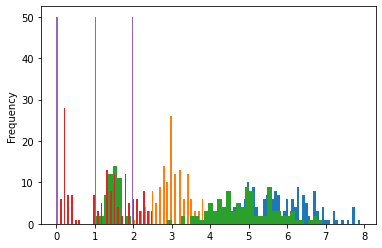

In [87]:
for column in iris_df:
    iris_df[column].plot.hist(bins=50)

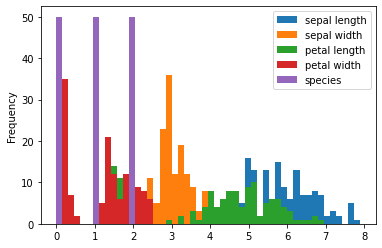

In [88]:
iris_df.plot.hist(bins=50)

In [89]:
iris_df.species.value_counts()

2    50
1    50
0    50
Name: species, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7848b72a00>,
      dtype=object)

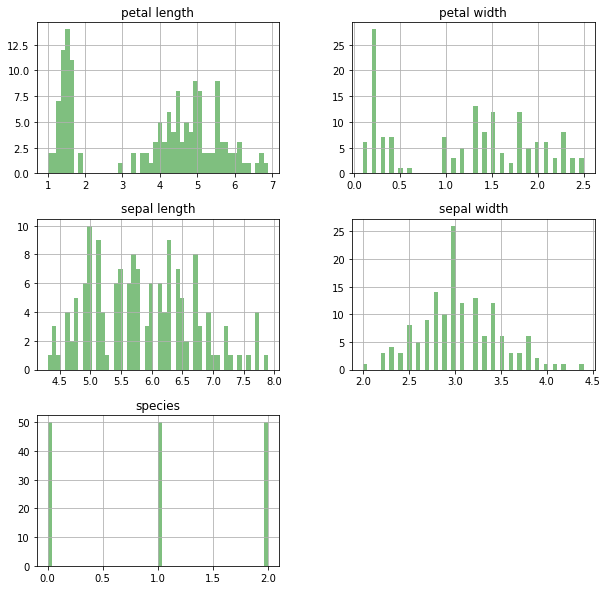

In [90]:
iris_df.hist(color="g", alpha=0.5, bins=50, figsize=(10,10))

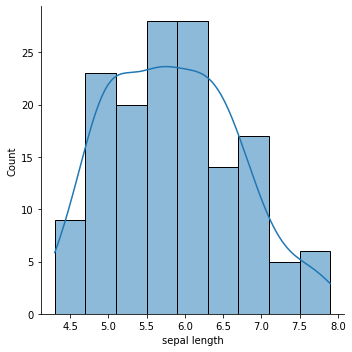

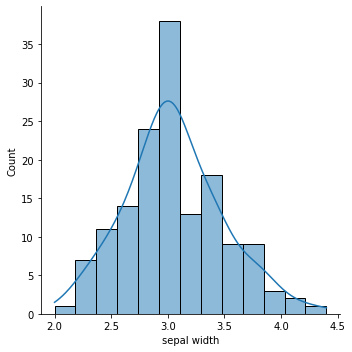

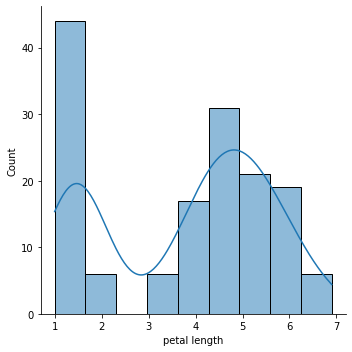

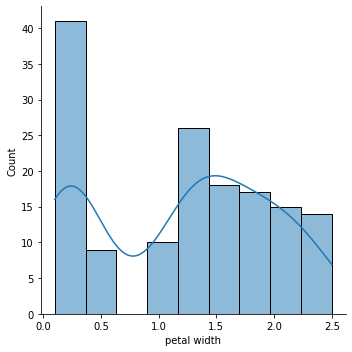

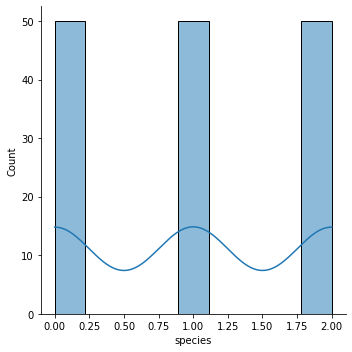

In [91]:
for column in iris_df:
    sns.displot(data=iris_df, x=column, kde=True)

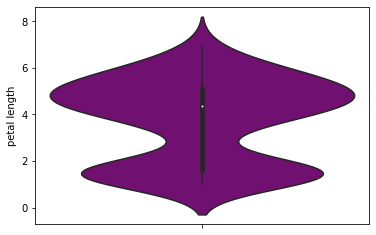

In [92]:
sns.violinplot(y='petal length', data=iris_df, color='purple')

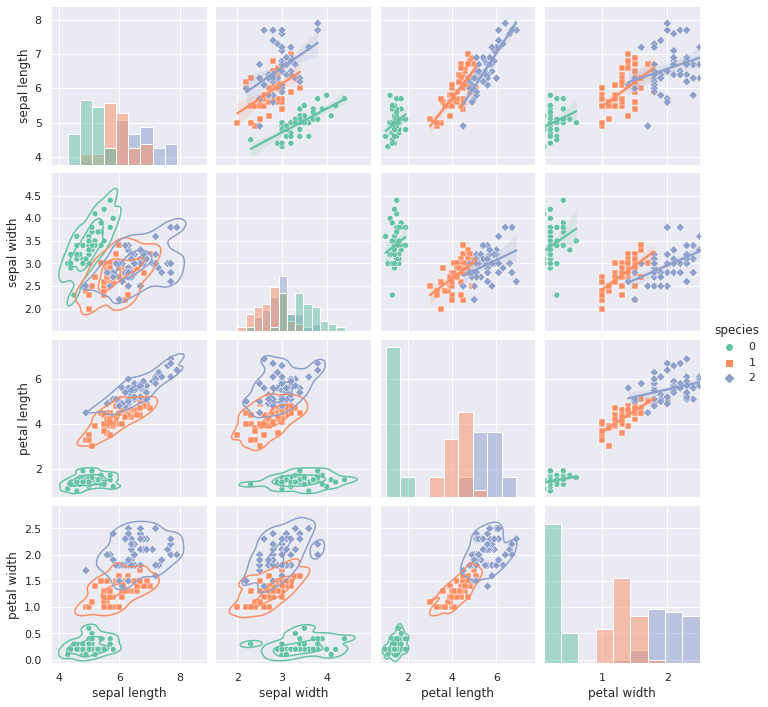

In [93]:
sns.set_theme(style='darkgrid')
g = sns.pairplot(data=iris_df, kind='scatter', diag_kind='hist', hue='species', palette='Set2', markers=["o", "s", "D"])
g.map_upper(sns.regplot, scatter_kws={"s":2})
g.map_lower(sns.kdeplot, levels=3)

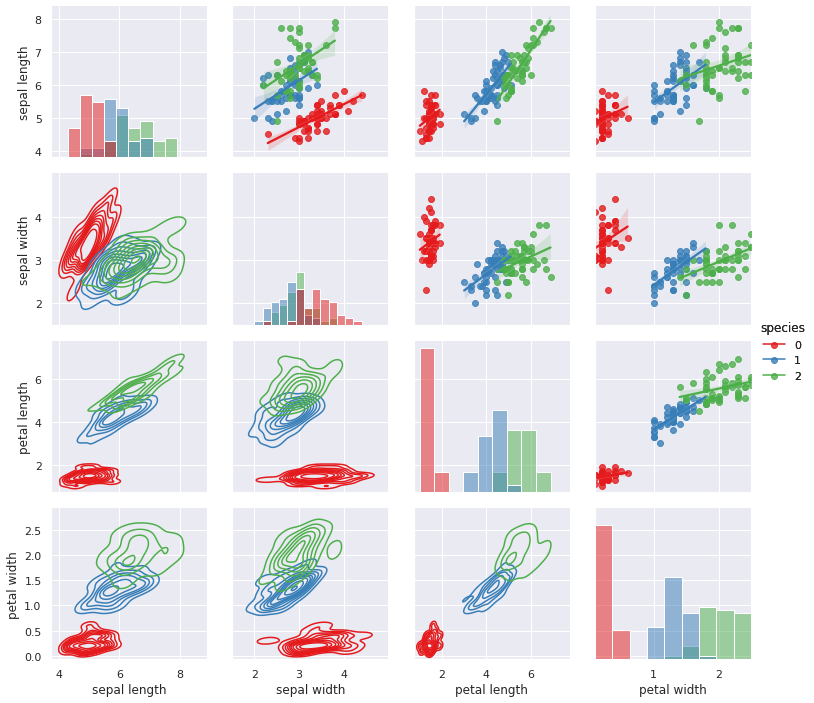

In [94]:
g = sns.PairGrid(data=iris_df, hue='species', palette='Set1')
g.map_upper(sns.regplot)
g.add_legend()
g.map_diag(sns.histplot)
g.map_lower(sns.kdeplot)
g.add_legend()

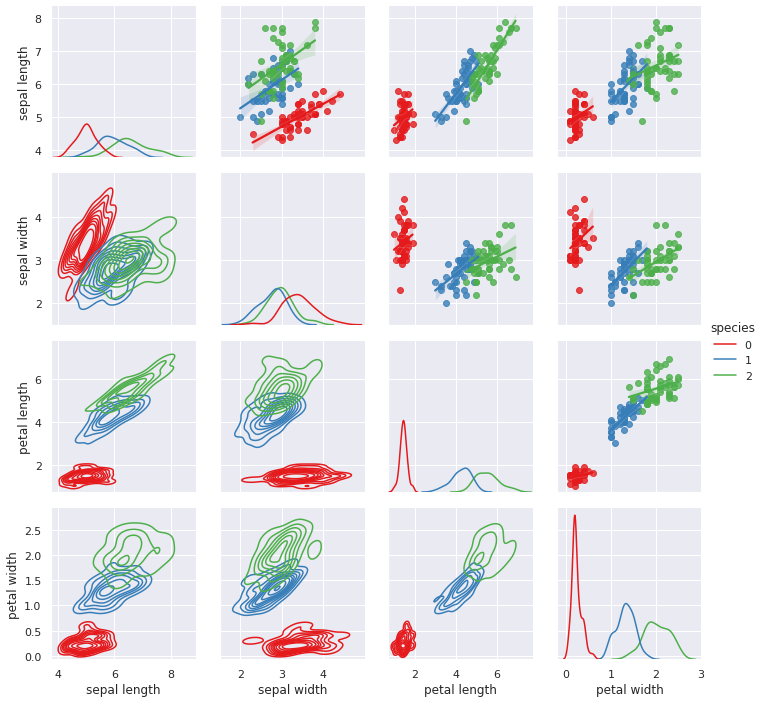

In [95]:
g = sns.PairGrid(data=iris_df, hue='species', palette='Set1')
g.map_upper(sns.regplot)
g.map_diag(sns.kdeplot)
g.map_lower(sns.kdeplot)
g.add_legend()

In [96]:
my_stat = pd.read_csv('my_stat_1.csv')
my_stat

,session_value,time,group,n_users
0,0.0,12,B,9
1,NaN,11,A,-1
2,1.0,8,A,1
3,2.0,9,B,3
4,2.0,10,B,9
5,3.0,8,A,8
6,NaN,11,B,5
7,0.0,9,A,4
8,0.0,8,B,-11
9,0.0,9,A,-20


In [97]:
my_stat.fillna(value={'session_value':0}, inplace=True)
my_stat

,session_value,time,group,n_users
0,0.0,12,B,9
1,0.0,11,A,-1
2,1.0,8,A,1
3,2.0,9,B,3
4,2.0,10,B,9
5,3.0,8,A,8
6,0.0,11,B,5
7,0.0,9,A,4
8,0.0,8,B,-11
9,0.0,9,A,-20


In [98]:
# Рассчитываем медиану
median_positive_n_users = my_stat\
.query('n_users >= 0')\
.n_users\
.median()\
.round(0)\
.astype(int)

median_positive_n_users

# Рассчитываем среднее, округлённое до целого и преобразованное в int
# mean_positive_n_users = my_stat\
# .query('n_users >= 0')\
# .n_users\
# .mean()\
# .round(0)\
# .astype(int)

# mean_positive_n_users

5

In [99]:
my_stat.dtypes

session_value    float64
time               int64
group             object
n_users            int64
dtype: object

In [100]:
# Замена отрицательных значений на медиану
# Вариант 1: через pd.DataFrame.mask()
# my_stat['n_users'] = my_stat.n_users.mask(cond=my_stat.n_users < 0, other=median_positive_n_users)
# my_stat

# или inplace!!
my_stat.n_users.mask(cond=my_stat.n_users < 0, other=median_positive_n_users,inplace=True)
my_stat

# Вариант 2: через pd.Series.apply()
# my_stat['n_users'] = my_stat.n_users.apply(lambda x: median_positive_n_users if x < 0 else x)
# my_stat

# Вариант 3: через pd.DataFrame.loc[ , ]
# my_stat.loc[my_stat.n_users < 0,'n_users'] = median_positive_n_users
# my_stat

# То же с заменой на среднее
# my_stat['n_users'] = my_stat.n_users.mask(cond=my_stat.n_users < 0, other=mean_positive_n_users)
# my_stat

,session_value,time,group,n_users
0,0.0,12,B,9
1,0.0,11,A,5
2,1.0,8,A,1
3,2.0,9,B,3
4,2.0,10,B,9
5,3.0,8,A,8
6,0.0,11,B,5
7,0.0,9,A,4
8,0.0,8,B,5
9,0.0,9,A,5


In [101]:
mean_session_value_data = my_stat\
.groupby('group', as_index=False)\
.agg({'session_value':'mean'})\
.rename(columns={'session_value':'mean_session_value'})
mean_session_value_data

,group,mean_session_value
0,A,0.8
1,B,0.8


# Глава 1.10

In [183]:
events_data = pd.read_csv('event_data_train.csv')
events_data.head()

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632


In [103]:
events_data.dtypes

step_id       int64
timestamp     int64
action       object
user_id       int64
dtype: object

In [104]:
events_data.count()

step_id      3480703
timestamp    3480703
action       3480703
user_id      3480703
dtype: int64

In [105]:
events_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480703 entries, 0 to 3480702
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   step_id    int64 
 1   timestamp  int64 
 2   action     object
 3   user_id    int64 
dtypes: int64(3), object(1)
memory usage: 106.2+ MB


In [106]:
events_data['date'] = pd.to_datetime(events_data.timestamp, unit='s')
events_data.head()

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35


In [107]:
events_data['day'] = events_data.date.dt.date

In [108]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [109]:
events_data.user_id.nunique()

19234

In [110]:
events_data.user_id[events_data.action == 'passed'].nunique()

17262

In [111]:
events_stats = events_data\
.groupby(['action', 'user_id'], as_index=False)\
.agg({'step_id':'count'})\
.sort_values(['action','step_id'], ascending=False)\
.rename(columns={'step_id':'actions_number'})

events_stats.head()

,action,user_id,actions_number
62889,viewed,20907,32778
55665,viewed,10794,16089
66032,viewed,25279,9693
48669,viewed,1046,8122
50497,viewed,3572,6968


In [112]:
events_stats.groupby('action').actions_number.describe()

,count,mean,std,min,25%,50%,75%,max
action,,,,,,,,
discovered,19226.0,35.862634,56.583244,1.0,1.0,9.0,42.0,198.0
passed,17262.0,37.674140,56.716672,1.0,1.0,10.0,46.0,198.0
started_attempt,11400.0,27.197105,36.692031,1.0,2.0,10.0,36.0,721.0
viewed,19227.0,95.221823,346.381604,1.0,1.0,12.0,89.0,32778.0


In [113]:
quantile_0_99 = events_stats.groupby('action').actions_number.quantile(0.99).to_dict()
quantile_0_99

{'discovered': 198.0,
 'passed': 198.0,
 'started_attempt': 137.0,
 'viewed': 899.7400000000016}

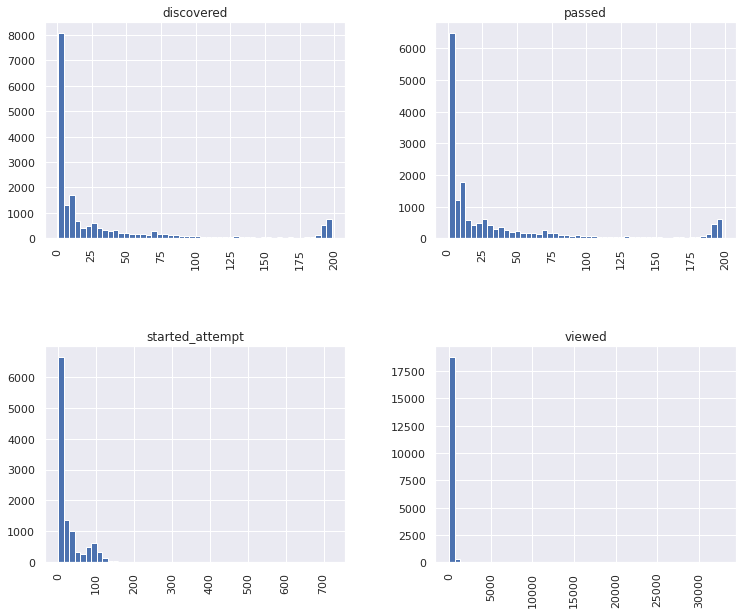

In [114]:
ax = events_stats\
.actions_number\
.hist(by=events_stats['action'], bins=50, figsize=(12,10))

In [115]:
events_stats['quantile_0_99'] = events_stats.action.apply(lambda x: quantile_0_99[x])

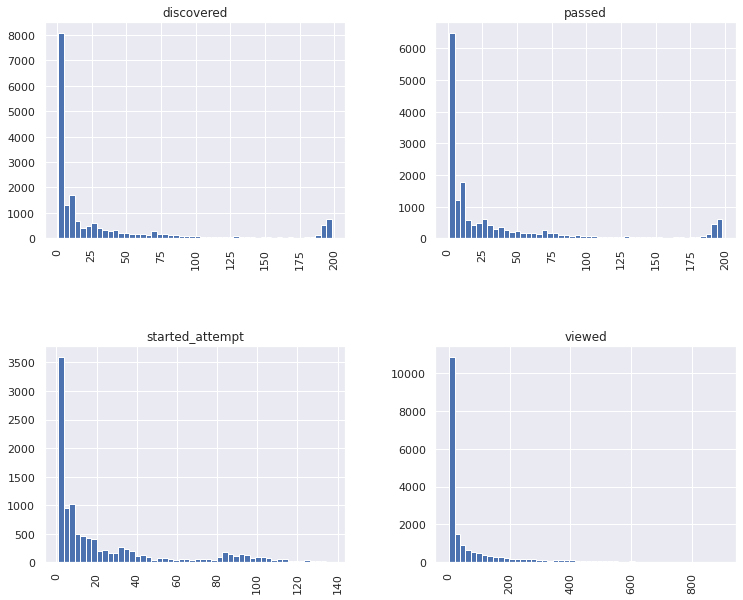

In [116]:
ax = events_stats\
.query('~( (actions_number > quantile_0_99) & (action in ["started_attempt", "viewed"]) )')\
.actions_number\
.hist(by=events_stats['action'], bins=50, figsize=(12,10))

In [117]:
events_data\
.pivot_table(index='user_id', columns='action', values='step_id', aggfunc='count', fill_value=0)\
.head()

action,discovered,passed,started_attempt,viewed
user_id,,,,
1,1,0,0,1
2,9,9,2,10
3,91,87,30,192
5,11,11,4,12
7,1,1,0,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x78392c4ca0>,
      dtype=object)

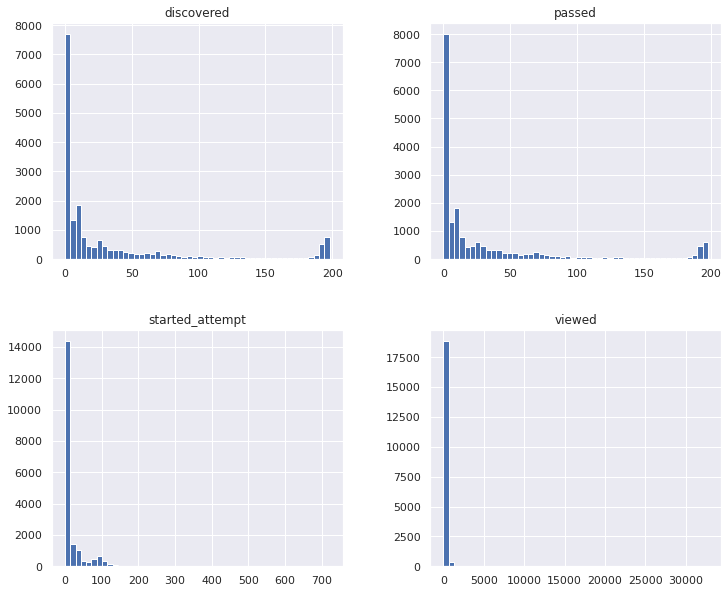

In [118]:
events_data\
.pivot_table(index='user_id', columns='action', values='step_id', aggfunc='count', fill_value=0)\
.hist(bins=50, figsize=(12,10))

In [119]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [120]:
events_data.drop(columns=['day']).head()

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35


In [121]:
def extract_date(df, column):
    df[f'{column} year'] = df[column].apply(lambda x:x.year)
    df[f'{column} month'] = df[column].apply(lambda x:x.month)

In [122]:
extract_date(events_data, 'date')

In [123]:
events_data.head()

,step_id,timestamp,action,user_id,date,day,date year,date month
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,2015,6
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,2015,6
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,2015,6
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,2015,6
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,2015,6


In [124]:
events_data.set_index('date', inplace=True)

In [125]:
events_data.head()

,step_id,timestamp,action,user_id,day,date year,date month
date,,,,,,,
2015-06-15 04:00:48,32815,1434340848,viewed,17632,2015-06-15,2015,6
2015-06-15 04:00:48,32815,1434340848,passed,17632,2015-06-15,2015,6
2015-06-15 04:00:48,32815,1434340848,discovered,17632,2015-06-15,2015,6
2015-06-15 04:01:35,32811,1434340895,discovered,17632,2015-06-15,2015,6
2015-06-15 04:01:35,32811,1434340895,viewed,17632,2015-06-15,2015,6


In [126]:
events_data.resample('Y').mean()

,step_id,timestamp,user_id,date year,date month
date,,,,,
2015-12-31,32873.179911,1.438296e+09,13610.394609,2015.0,7.470770
2016-12-31,34019.943790,1.469133e+09,13339.201521,2016.0,7.165749
2017-12-31,36394.168285,1.499609e+09,13099.224931,2017.0,6.755591
2018-12-31,36092.028681,1.520983e+09,13258.807683,2018.0,2.908536


In [127]:
new_events_data = events_data.resample('M').mean()
new_events_data

,step_id,timestamp,user_id,date year,date month
date,,,,,
2015-06-30,32609.699043,1.435002e+09,13110.564509,2015.0,6.0
2015-07-31,33131.139669,1.436560e+09,13568.436441,2015.0,7.0
2015-08-31,32802.874457,1.439784e+09,15430.606182,2015.0,8.0
2015-09-30,32725.500753,1.442319e+09,15035.094857,2015.0,9.0
2015-10-31,32734.172844,1.445222e+09,14297.456279,2015.0,10.0
2015-11-30,32800.241970,1.447612e+09,14140.340982,2015.0,11.0
2015-12-31,32840.624546,1.450181e+09,13490.822805,2015.0,12.0
2016-01-31,32794.939404,1.453076e+09,13415.122528,2016.0,1.0
2016-02-29,32815.864116,1.455587e+09,13779.705069,2016.0,2.0


In [128]:
new_events_data['2018']

,step_id,timestamp,user_id,date year,date month
date,,,,,
2018-01-31,36066.528403,1.516083e+09,13599.388446,2018.0,1.0
2018-02-28,36189.745056,1.518723e+09,13445.492702,2018.0,2.0
2018-03-31,35759.211749,1.521278e+09,13088.821468,2018.0,3.0
2018-04-30,36368.050771,1.523872e+09,13062.143696,2018.0,4.0
2018-05-31,36339.992882,1.525944e+09,13232.334234,2018.0,5.0


In [129]:
new_events_data['2018-05']

,step_id,timestamp,user_id,date year,date month
date,,,,,
2018-05-31,36339.992882,1.525944e+09,13232.334234,2018.0,5.0


In [130]:
new_events_data['2015-08':'2018-04']

,step_id,timestamp,user_id,date year,date month
date,,,,,
2015-08-31,32802.874457,1.439784e+09,15430.606182,2015.0,8.0
2015-09-30,32725.500753,1.442319e+09,15035.094857,2015.0,9.0
2015-10-31,32734.172844,1.445222e+09,14297.456279,2015.0,10.0
2015-11-30,32800.241970,1.447612e+09,14140.340982,2015.0,11.0
2015-12-31,32840.624546,1.450181e+09,13490.822805,2015.0,12.0
2016-01-31,32794.939404,1.453076e+09,13415.122528,2016.0,1.0
2016-02-29,32815.864116,1.455587e+09,13779.705069,2016.0,2.0
2016-03-31,32762.855760,1.458175e+09,12954.042779,2016.0,3.0
2016-04-30,32834.568237,1.460651e+09,12859.237911,2016.0,4.0


In [131]:
events_data.resample('D').mean()['2015-08-01':'2018-04-01']

,step_id,timestamp,user_id,date year,date month
date,,,,,
2015-08-01,32622.446360,1.438436e+09,14840.034483,2015.0,8.0
2015-08-02,32719.996032,1.438524e+09,13197.288360,2015.0,8.0
2015-08-03,32815.008222,1.438605e+09,15433.860226,2015.0,8.0
2015-08-04,33001.398164,1.438693e+09,17592.905676,2015.0,8.0
2015-08-05,32946.242764,1.438780e+09,17316.809524,2015.0,8.0
...,...,...,...,...,...
2018-03-28,35501.796305,1.522253e+09,13302.604619,2018.0,3.0
2018-03-29,35344.338266,1.522322e+09,12416.741727,2018.0,3.0
2018-03-30,35448.929632,1.522418e+09,13938.218851,2018.0,3.0


# Глава 1.11

In [136]:
submissions_data = pd.read_csv('submissions_data_train.csv')
submissions_data.head()

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853


In [142]:
events_data = events_data.reset_index()

,index,date,step_id,timestamp,action,user_id,day,date year,date month
0,0,2015-06-15 04:00:48,32815,1434340848,viewed,17632,2015-06-15,2015,6
1,1,2015-06-15 04:00:48,32815,1434340848,passed,17632,2015-06-15,2015,6
2,2,2015-06-15 04:00:48,32815,1434340848,discovered,17632,2015-06-15,2015,6
3,3,2015-06-15 04:01:35,32811,1434340895,discovered,17632,2015-06-15,2015,6
4,4,2015-06-15 04:01:35,32811,1434340895,viewed,17632,2015-06-15,2015,6


In [146]:
events_data.head()

,index,date,step_id,timestamp,action,user_id,day,date year,date month
0,0,2015-06-15 04:00:48,32815,1434340848,viewed,17632,2015-06-15,2015,6
1,1,2015-06-15 04:00:48,32815,1434340848,passed,17632,2015-06-15,2015,6
2,2,2015-06-15 04:00:48,32815,1434340848,discovered,17632,2015-06-15,2015,6
3,3,2015-06-15 04:01:35,32811,1434340895,discovered,17632,2015-06-15,2015,6
4,4,2015-06-15 04:01:35,32811,1434340895,viewed,17632,2015-06-15,2015,6


In [149]:
events_data.groupby('user_id').day.apply(list)

user_id
1                                 [2016-09-02, 2016-09-02]
2        [2017-12-27, 2017-12-27, 2017-12-27, 2017-12-2...
3        [2015-06-15, 2015-06-15, 2015-06-15, 2015-06-1...
5        [2016-06-17, 2016-06-17, 2016-06-17, 2017-07-1...
7                     [2018-03-21, 2018-03-21, 2018-03-21]
                               ...                        
26790    [2015-12-30, 2015-12-30, 2015-12-30, 2015-12-3...
26793                 [2017-11-09, 2017-11-09, 2017-11-09]
26794    [2017-05-20, 2017-05-20, 2017-05-20, 2017-05-2...
26797    [2017-10-19, 2017-10-19, 2017-10-19, 2017-10-1...
26798    [2018-03-13, 2018-03-13, 2018-03-13, 2018-03-1...
Name: day, Length: 19234, dtype: object

In [154]:
events_data.groupby('user_id').day.apply(lambda x: x.max()-x.min()).sort_values(ascending=False).head(20)

user_id
6369    1065 days
828     1064 days
5647    1064 days
7317    1063 days
18057   1063 days
3791    1062 days
17135   1062 days
20681   1061 days
20052   1060 days
14413   1059 days
9610    1058 days
7596    1058 days
13517   1057 days
4894    1055 days
3154    1054 days
14370   1054 days
24228   1053 days
16215   1053 days
20555   1051 days
25123   1051 days
Name: day, dtype: timedelta64[ns]

In [201]:
events_data_pivot = events_data.pivot_table(index= 'user_id', 
                        columns = 'action', 
                        values = 'step_id', 
                        aggfunc = 'count', 
                        fill_value = 0)
events_data_pivot

action,discovered,passed,started_attempt,viewed
user_id,,,,
1,1,0,0,1
2,9,9,2,10
3,91,87,30,192
5,11,11,4,12
7,1,1,0,1
...,...,...,...,...
26790,8,8,1,9
26793,1,0,1,1
26794,69,69,34,180


In [205]:
events_data_pivot.sort_values(['passed','started_attempt','viewed'], ascending=False)

action,discovered,passed,started_attempt,viewed
user_id,,,,
5552,198,198,224,1141
19636,198,198,208,303
23971,198,198,207,1421
2567,198,198,180,1190
16081,198,198,175,902
...,...,...,...,...
26632,1,0,0,1
26705,1,0,0,1
26726,1,0,0,1


In [174]:
events_data_pivot.loc[[1,3,5]]

action,discovered,passed,started_attempt,viewed
user_id,,,,
1,1,0,0,1
3,91,87,30,192
5,11,11,4,12


In [176]:
top_user_id = [events_data_pivot[column].idxmax() for column in events_data_pivot]
top_user_id

[22, 22, 1046, 20907]

In [177]:
top_user_values = [events_data_pivot[column].max() for column in events_data_pivot]
top_user_values

[198, 198, 721, 32778]

In [178]:
events_data_pivot.loc[set(top_user_id)]

action,discovered,passed,started_attempt,viewed
user_id,,,,
20907,163,102,0,32778
22,198,198,89,492
1046,128,124,721,8122


In [181]:
events_data

,index,date,step_id,timestamp,action,user_id,day,date year,date month
0,0,2015-06-15 04:00:48,32815,1434340848,viewed,17632,2015-06-15,2015,6
1,1,2015-06-15 04:00:48,32815,1434340848,passed,17632,2015-06-15,2015,6
2,2,2015-06-15 04:00:48,32815,1434340848,discovered,17632,2015-06-15,2015,6
3,3,2015-06-15 04:01:35,32811,1434340895,discovered,17632,2015-06-15,2015,6
4,4,2015-06-15 04:01:35,32811,1434340895,viewed,17632,2015-06-15,2015,6
...,...,...,...,...,...,...,...,...,...
3480698,3480698,2018-05-19 23:31:25,33375,1526772685,viewed,11677,2018-05-19,2018,5
3480699,3480699,2018-05-19 23:32:30,32815,1526772750,viewed,5198,2018-05-19,2018,5
3480700,3480700,2018-05-19 23:32:30,32815,1526772750,discovered,5198,2018-05-19,2018,5
3480701,3480701,2018-05-19 23:32:30,32815,1526772750,passed,5198,2018-05-19,2018,5


In [199]:
events_data\
.groupby('action')\
.agg({'user_id':'value_counts'})\
.rename(columns={'user_id':'number_of_actions'})\
.reset_index()\
.groupby('action')\
.head()

# .sort_values(['action',], ascending=False)\
# groupby('action',as_index=False).agg({'user_id':'count'})

,action,user_id,number_of_actions
0,discovered,22,198
1,discovered,30,198
2,discovered,34,198
3,discovered,39,198
4,discovered,80,198
19226,passed,22,198
19227,passed,30,198
19228,passed,39,198
19229,passed,80,198
19230,passed,149,198


In [ ]:
events_data.sort_values(['action','passed'], ascending=False)\